# Практическая работа №2
### Выполнил студент группы БВТ2102 Маширин Федор Сергеевич
## Бинарная классификация
#### Цель работы: дополнить фрагмент кода моделью ИНС, которая способна провести бинарную классификацию по сгенерированным данным.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [12]:
def genData(size=500):
    data = np.random.rand(size, 2)*2 - 1
    label = np.zeros([size, 1])
    for i, p in enumerate(data):
        if p[0]*p[1] >= 0:
            label[i] = 1.
        else:
            label[i] = 0.
    div = round(size*0.8)
    train_data = data[:div, :]
    test_data = data[div:, :]
    train_label = label[:div, :]
    test_label = label[div:, :]
    return (train_data, train_label), (test_data, test_label)

In [13]:
def drawResults(data, label, prediction):
  p_label = np.array([round(x[0]) for x in prediction])
  plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
  plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
  plt.grid()
  plt.show()

In [24]:
(train_data, train_label), (test_data, test_label) = genData()
model = Sequential()
model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

H = model.fit(train_data, train_label, epochs=30, batch_size=12, validation_split=0.2)

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 0.6932 - val_accuracy: 0.4875 - val_loss: 0.6929
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5225 - loss: 0.6928 - val_accuracy: 0.6875 - val_loss: 0.6923
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7190 - loss: 0.6923 - val_accuracy: 0.8500 - val_loss: 0.6910
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9152 - loss: 0.6907 - val_accuracy: 0.8500 - val_loss: 0.6883
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - loss: 0.6880 - val_accuracy: 0.8500 - val_loss: 0.6836
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9090 - loss: 0.6828 - val_accuracy: 0.8750 - val_loss: 0.6758
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8399 - loss: 0.6764 - val_accuracy: 0.8750 - val_loss: 0.6640
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.8364 - loss: 0.6644 - val_accuracy: 0.8625 - val

In [25]:
#Получение ошибки и точности в процессе обучения
loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)

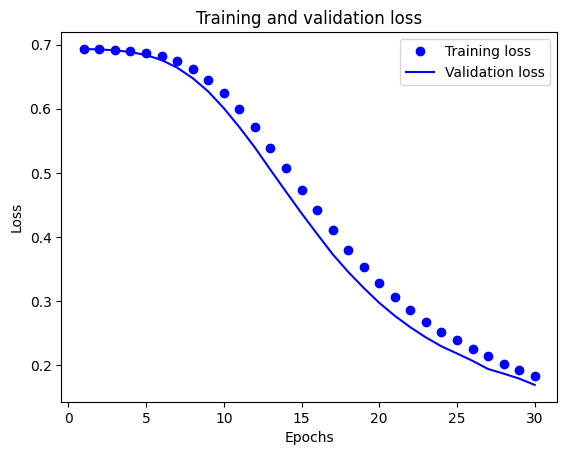

In [26]:
#Построение графика ошибки
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

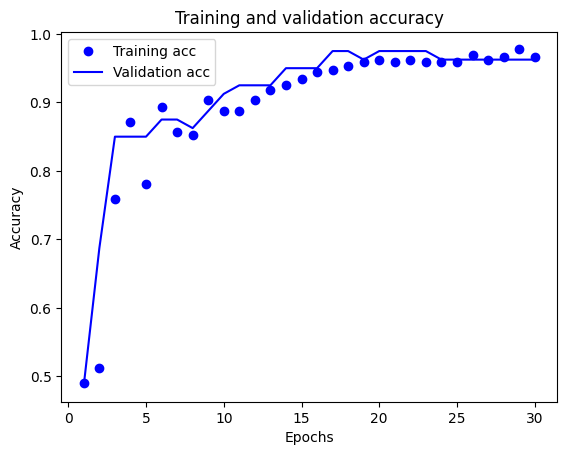

In [27]:
#Построение графика точности
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
#Получение и вывод результатов на тестовом наборе
results = model.evaluate(test_data, test_label)
print(results)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9724 - loss: 0.1802
[0.18012994527816772, 0.9700000286102295]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


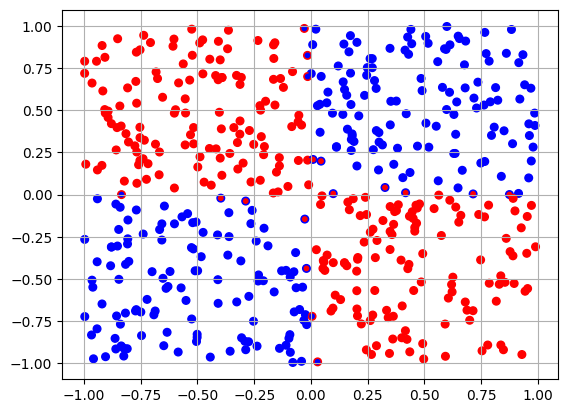

In [29]:
#Вывод результатов бинарной классификации
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = model.predict(all_data)
drawResults(all_data, all_label, pred)

### Вывод
#### В ходе работы была создана модель ИНС, которая способна провести бинарную классификацию по сгенерированным данным.